# Dimensionality Reduction

In [1]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction
from sklearn.decomposition import PCA

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [7]:
# Import custom class
%run -i '../src/helper/transfxn.py'
%run -i '../src/helper/imputer.py'

# Load data 

In [8]:
df = pd.read_csv('../data/hmeq.csv') # load data
print("Data size:", df.shape) # print data size
df.columns = [x.lower() for x in df.columns] # column names in lower case
df.head()

Data size: (5960, 13)


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Create feature matrix and class label

In [9]:
X,y = df.drop('bad', axis =1), df.bad

# Transformation pipeline

In [10]:
# Instantiate the  classes
transfxn = TransformationPipeline()
imputer = DataFrameImputer()

In [11]:
# Impute missing values
X_imputed = imputer.fit_transform(X)

In [12]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   loan     5960 non-null   int64  
 1   mortdue  5960 non-null   float64
 2   value    5960 non-null   float64
 3   reason   5960 non-null   object 
 4   job      5960 non-null   object 
 5   yoj      5960 non-null   float64
 6   derog    5960 non-null   float64
 7   delinq   5960 non-null   float64
 8   clage    5960 non-null   float64
 9   ninq     5960 non-null   float64
 10  clno     5960 non-null   float64
 11  debtinc  5960 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 558.9+ KB


In [13]:
# Transform and scale data
X_scaled, _, _ = transfxn.preprocessing(X_imputed, X_imputed)

In [14]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (5960, 18)


# PCA plot

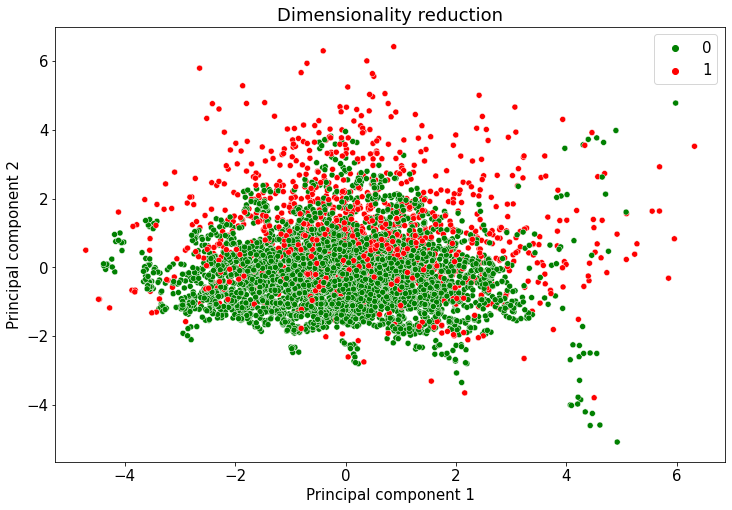

In [15]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])